In [24]:
%matplotlib inline

In [25]:
import numpy as np
import pandas as pd
from sklearn import metrics
from scipy.stats import zscore
from sklearn.neighbors import KNeighborsClassifier

In [26]:
#wine_df = pd.read_csv("wine.csv")

In [27]:
wine_df = pd.read_csv("wine.csv", names = ["Cultivator", "Alchol", "Malic_Acid", "Ash", "Alcalinity_of_Ash", "Magnesium", "Total_phenols", "Falvanoids", "Nonflavanoid_phenols", "Proanthocyanins", "Color_intensity", "Hue", "OD280", "Proline"])

In [28]:
#wine_df = pd.read_csv('d:\gli\dse\data\wine.csv', names = ["Cultivator", "Alchol", "Malic_Acid", "Ash", "Alcalinity_of_Ash", "Magnesium", "Total_phenols", "Falvanoids", "Nonflavanoid_phenols", "Proanthocyanins", "Color_intensity", "Hue", "OD280", "Proline"])

In [29]:
wine_df.describe()

Cultivator      Alchol  Malic_Acid         Ash  Alcalinity_of_Ash  \
count  178.000000  178.000000  178.000000  178.000000         178.000000   
mean     1.938202   13.000618    2.336348    2.366517          19.494944   
std      0.775035    0.811827    1.117146    0.274344           3.339564   
min      1.000000   11.030000    0.740000    1.360000          10.600000   
25%      1.000000   12.362500    1.602500    2.210000          17.200000   
50%      2.000000   13.050000    1.865000    2.360000          19.500000   
75%      3.000000   13.677500    3.082500    2.557500          21.500000   
max      3.000000   14.830000    5.800000    3.230000          30.000000   

        Magnesium  Total_phenols  Falvanoids  Nonflavanoid_phenols  \
count  178.000000     178.000000  178.000000            178.000000   
mean    99.741573       2.295112    2.029270              0.361854   
std     14.282484       0.625851    0.998859              0.124453   
min     70.000000       0.980000    0.340000              0.130000   
25%     88.000000       1.742500    1.205000              0.270000   
50%     98.000000       2.355000    2.135000              0.340000   
75%    107.000000       2.800000    2.875000              0.437500   
max    162.000000       3.880000    5.080000              0.660000   

       Proanthocyanins  Color_intensity         Hue       OD280      Proline  
count       178.000000       178.000000  178.000000  178.000000   178.000000  
mean          1.590899         5.058090    0.957449    2.611685   746.893258  
std           0.572359         2.318286    0.228572    0.709990   314.907474  
min           0.410000         1.280000    0.480000    1.270000   278.000000  
25%           1.250000         3.220000    0.782500    1.937500   500.500000  
50%           1.555000         4.690000    0.965000    2.780000   673.500000  
75%           1.950000         6.200000    1.120000    3.170000   985.000000  
max           3.580000        13.000000    1.710000    4.000000  1680.000000

In [36]:
wine_df.describe().T

count        mean         std     min       25%  \
Cultivator            178.0    1.938202    0.775035    1.00    1.0000   
Alchol                178.0   13.000618    0.811827   11.03   12.3625   
Malic_Acid            178.0    2.336348    1.117146    0.74    1.6025   
Ash                   178.0    2.366517    0.274344    1.36    2.2100   
Alcalinity_of_Ash     178.0   19.494944    3.339564   10.60   17.2000   
Magnesium             178.0   99.741573   14.282484   70.00   88.0000   
Total_phenols         178.0    2.295112    0.625851    0.98    1.7425   
Falvanoids            178.0    2.029270    0.998859    0.34    1.2050   
Nonflavanoid_phenols  178.0    0.361854    0.124453    0.13    0.2700   
Proanthocyanins       178.0    1.590899    0.572359    0.41    1.2500   
Color_intensity       178.0    5.058090    2.318286    1.28    3.2200   
Hue                   178.0    0.957449    0.228572    0.48    0.7825   
OD280                 178.0    2.611685    0.709990    1.27    1.9375   
Proline               178.0  746.893258  314.907474  278.00  500.5000   

                          50%       75%      max  
Cultivator              2.000    3.0000     3.00  
Alchol                 13.050   13.6775    14.83  
Malic_Acid              1.865    3.0825     5.80  
Ash                     2.360    2.5575     3.23  
Alcalinity_of_Ash      19.500   21.5000    30.00  
Magnesium              98.000  107.0000   162.00  
Total_phenols           2.355    2.8000     3.88  
Falvanoids              2.135    2.8750     5.08  
Nonflavanoid_phenols    0.340    0.4375     0.66  
Proanthocyanins         1.555    1.9500     3.58  
Color_intensity         4.690    6.2000    13.00  
Hue                     0.965    1.1200     1.71  
OD280                   2.780    3.1700     4.00  
Proline               673.500  985.0000  1680.00

In [32]:
df = wine_df

In [34]:
df["Cultivator"].unique()

array([1, 2, 3], dtype=int64)

In [7]:
wine_df.shape

(178, 14)

In [ ]:
# there is not sufficient data to learn the data completely since there are only 178 rows and 14 columns.

In [8]:
wine_df.info()  # many columns are of type object i.e. strings. These need to be converted to ordinal type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Cultivator            178 non-null    int64  
 1   Alchol                178 non-null    float64
 2   Malic_Acid            178 non-null    float64
 3   Ash                   178 non-null    float64
 4   Alcalinity_of_Ash     178 non-null    float64
 5   Magnesium             178 non-null    int64  
 6   Total_phenols         178 non-null    float64
 7   Falvanoids            178 non-null    float64
 8   Nonflavanoid_phenols  178 non-null    float64
 9   Proanthocyanins       178 non-null    float64
 10  Color_intensity       178 non-null    float64
 11  Hue                   178 non-null    float64
 12  OD280                 178 non-null    float64
 13  Proline               178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [37]:
#all datapoints are numeric and no null values which is good and as we wanted for the distance calculations.

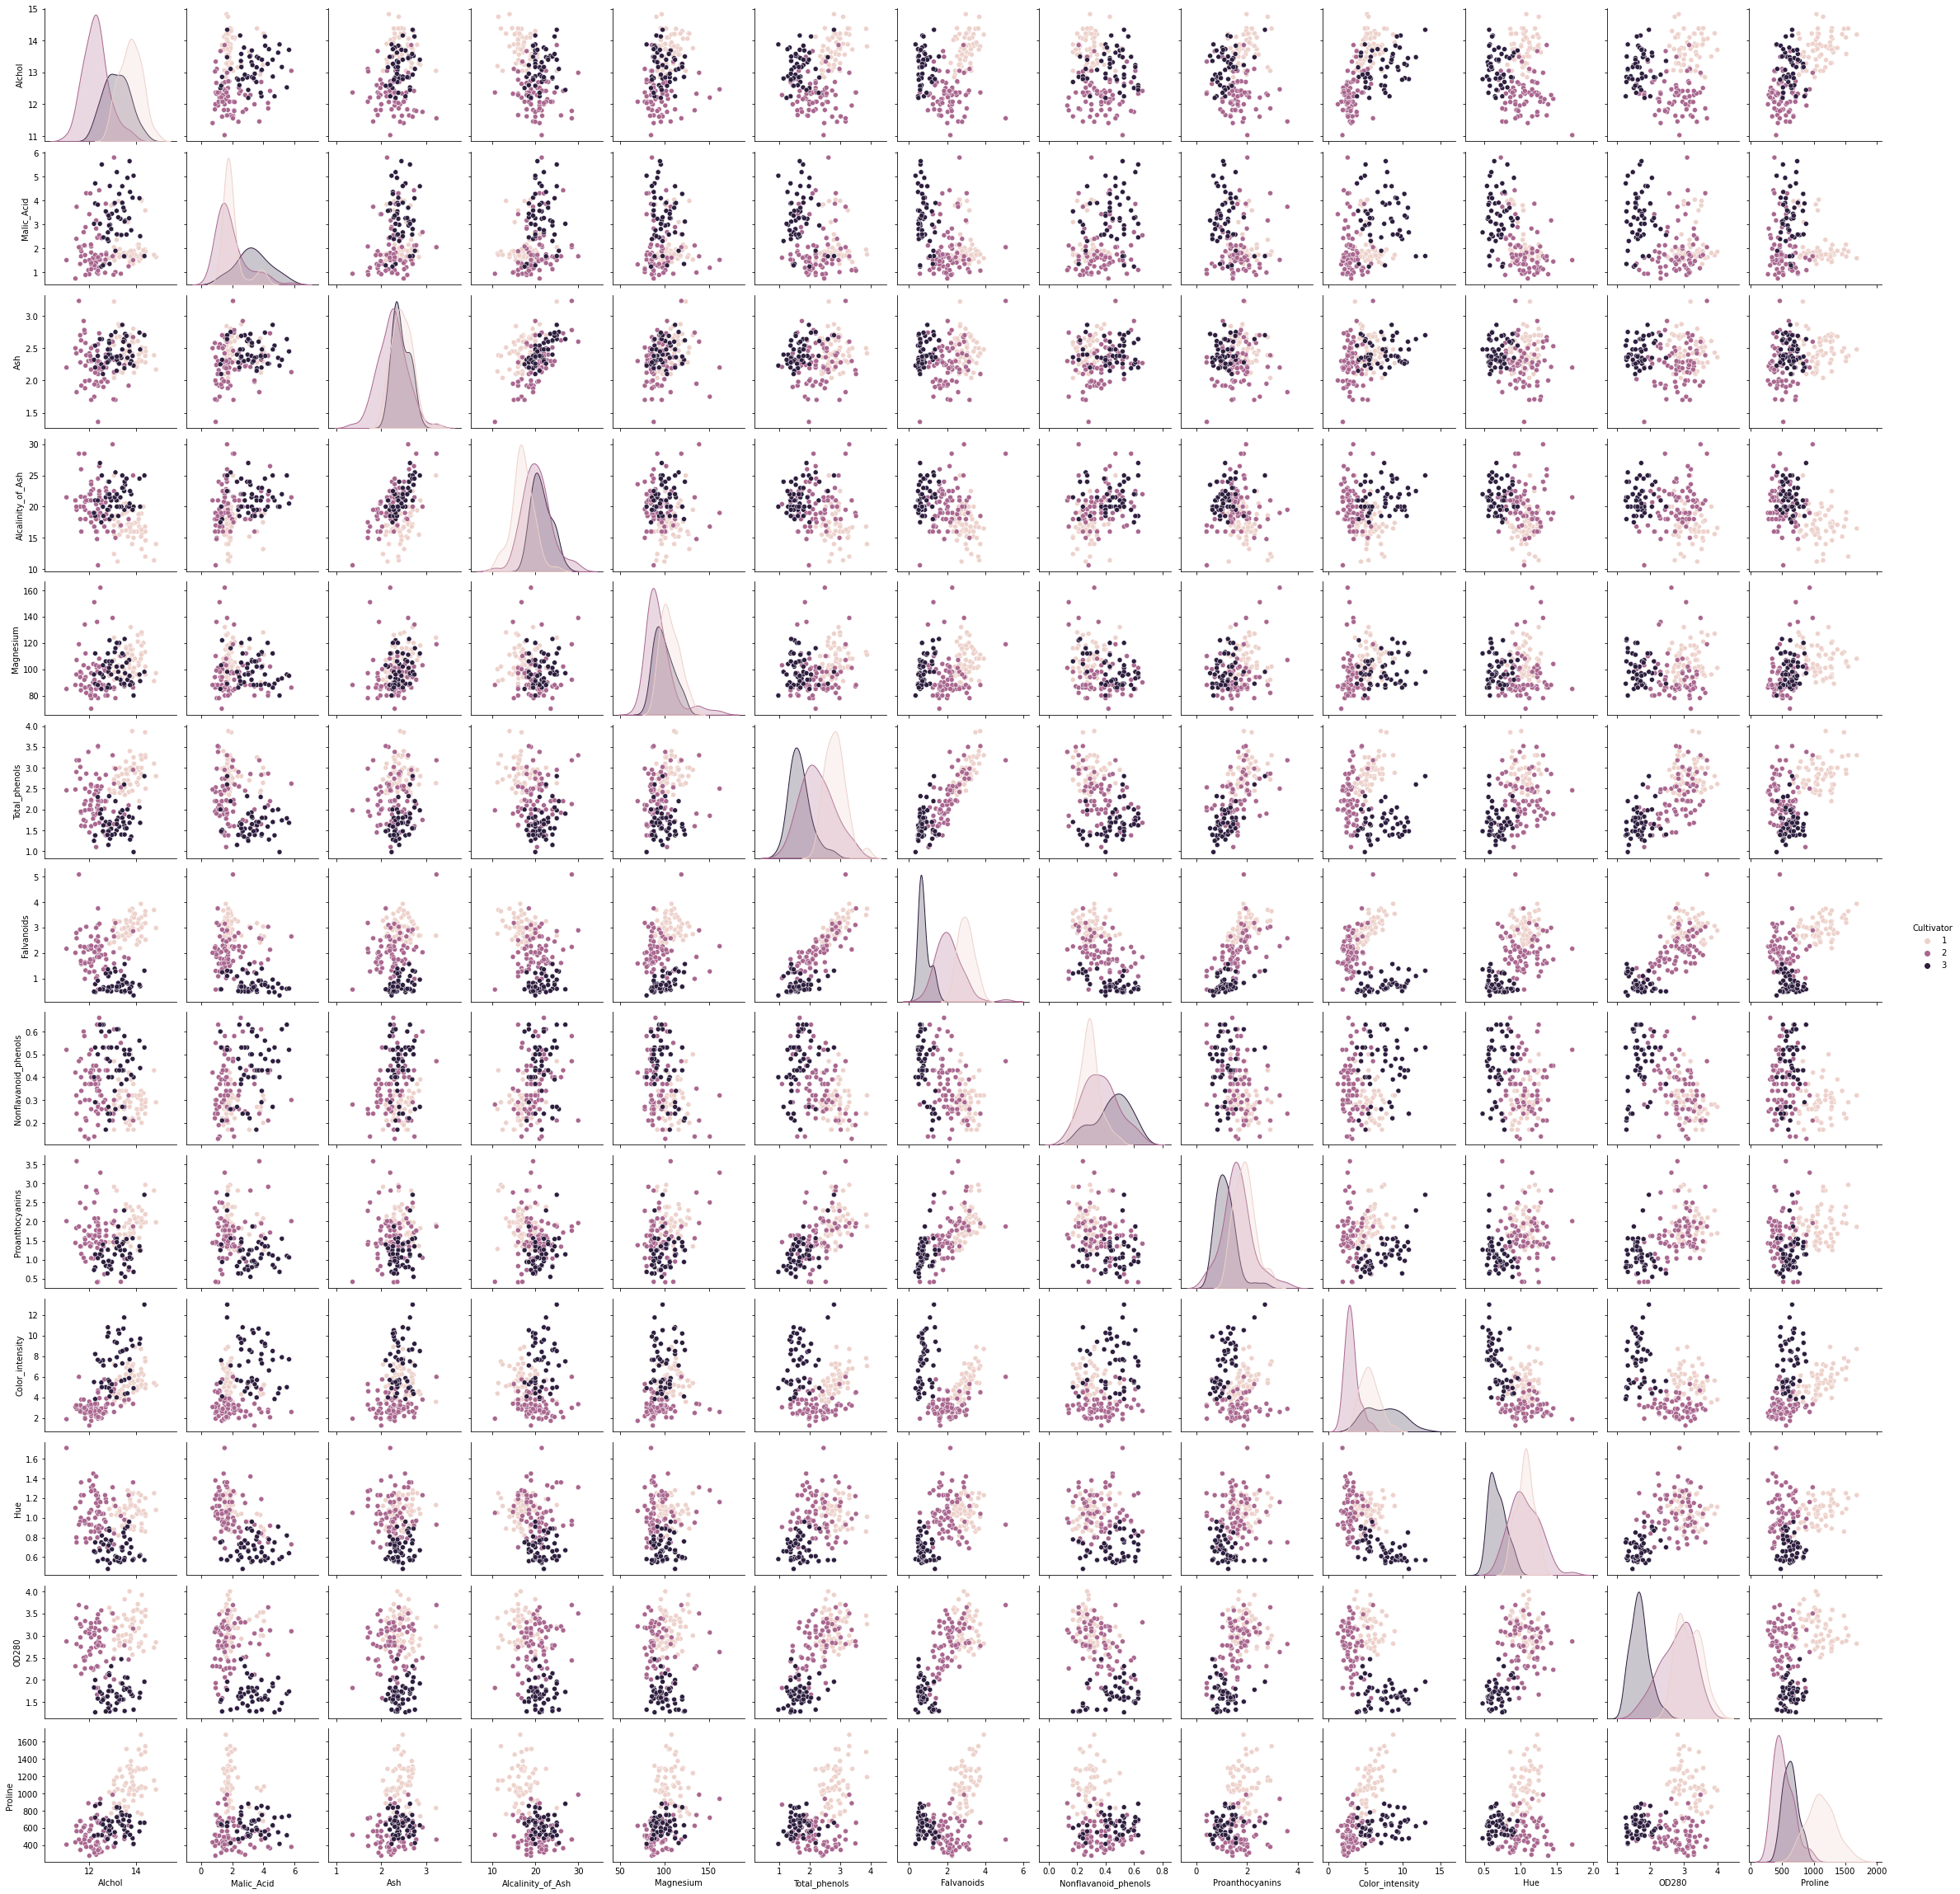

In [9]:
import seaborn as sns

sns.pairplot(data = wine_df , hue='Cultivator')

In [10]:
y = wine_df.pop('Cultivator')
wine_df_z = wine_df.apply(zscore)

In [11]:
wine_df_z.head()

Alchol  Malic_Acid       Ash  Alcalinity_of_Ash  Magnesium  \
0  1.518613   -0.562250  0.232053          -1.169593   1.913905   
1  0.246290   -0.499413 -0.827996          -2.490847   0.018145   
2  0.196879    0.021231  1.109334          -0.268738   0.088358   
3  1.691550   -0.346811  0.487926          -0.809251   0.930918   
4  0.295700    0.227694  1.840403           0.451946   1.281985   

   Total_phenols  Falvanoids  Nonflavanoid_phenols  Proanthocyanins  \
0       0.808997    1.034819             -0.659563         1.224884   
1       0.568648    0.733629             -0.820719        -0.544721   
2       0.808997    1.215533             -0.498407         2.135968   
3       2.491446    1.466525             -0.981875         1.032155   
4       0.808997    0.663351              0.226796         0.401404   

   Color_intensity       Hue     OD280   Proline  
0         0.251717  0.362177  1.847920  1.013009  
1        -0.293321  0.406051  1.113449  0.965242  
2         0.269020  0.318304  0.788587  1.395148  
3         1.186068 -0.427544  1.184071  2.334574  
4        -0.319276  0.362177  0.449601 -0.037874

In [12]:
# splitting data into training and test set for independent attributes
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(wine_df_z, y, test_size=0.30, random_state=1)





In [13]:
NNH = KNeighborsClassifier(n_neighbors= 3)

NNH.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [14]:
NNH.score(X_train, y_train)

0.967741935483871

In [15]:
NNH.score(X_test , y_test)      # performance on test data

0.9814814814814815

In [16]:
predicted_labels = NNH.predict(X_test)
print(metrics.confusion_matrix(y_test, predicted_labels))


[[23  0  0]
 [ 1 18  0]
 [ 0  0 12]]


In [17]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# creating odd list of K for KNN
myList = list(range(1,50))


# empty list that will hold cv scores
cv_scores = []
k_neighbors = []

# perform 10-fold cross validation
for k in myList:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())
    k_neighbors.append(k)


MSE = [1 - x for x in cv_scores]
min(MSE)
MSE.index(min(MSE))
best_k = myList[MSE.index(min(MSE))]
print ("The optimal number of neighbors is %d" % best_k)

The optimal number of neighbors is 31


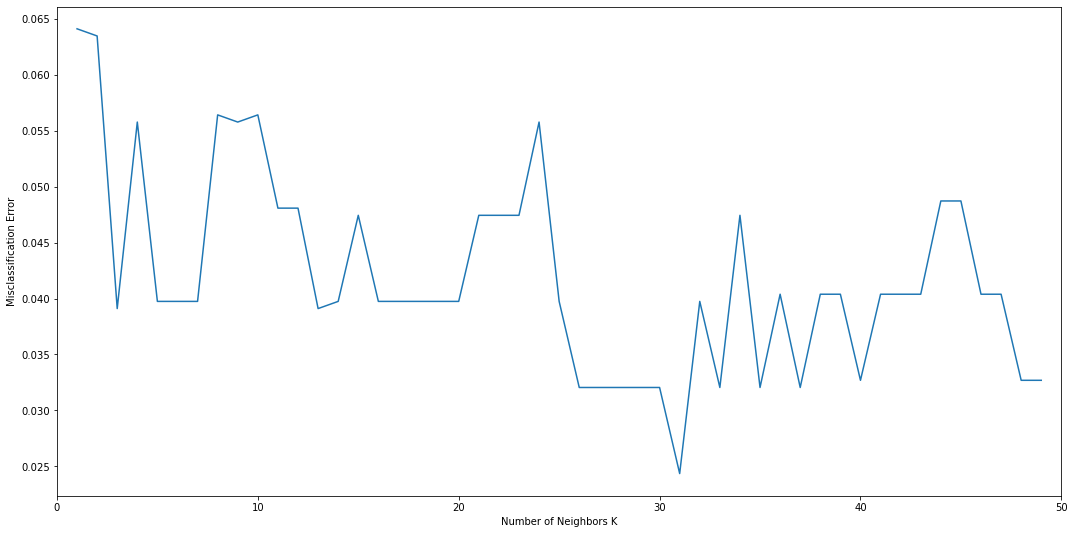

In [18]:
import matplotlib.pyplot as plt

fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 18
fig_size[1] = 9
plt.rcParams["figure.figsize"] = fig_size

plt.xlim(0,50)


# plot misclassification error vs k
plt.plot(k_neighbors, MSE)



plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

In [19]:
wine_df_z['Cultivator'] = y

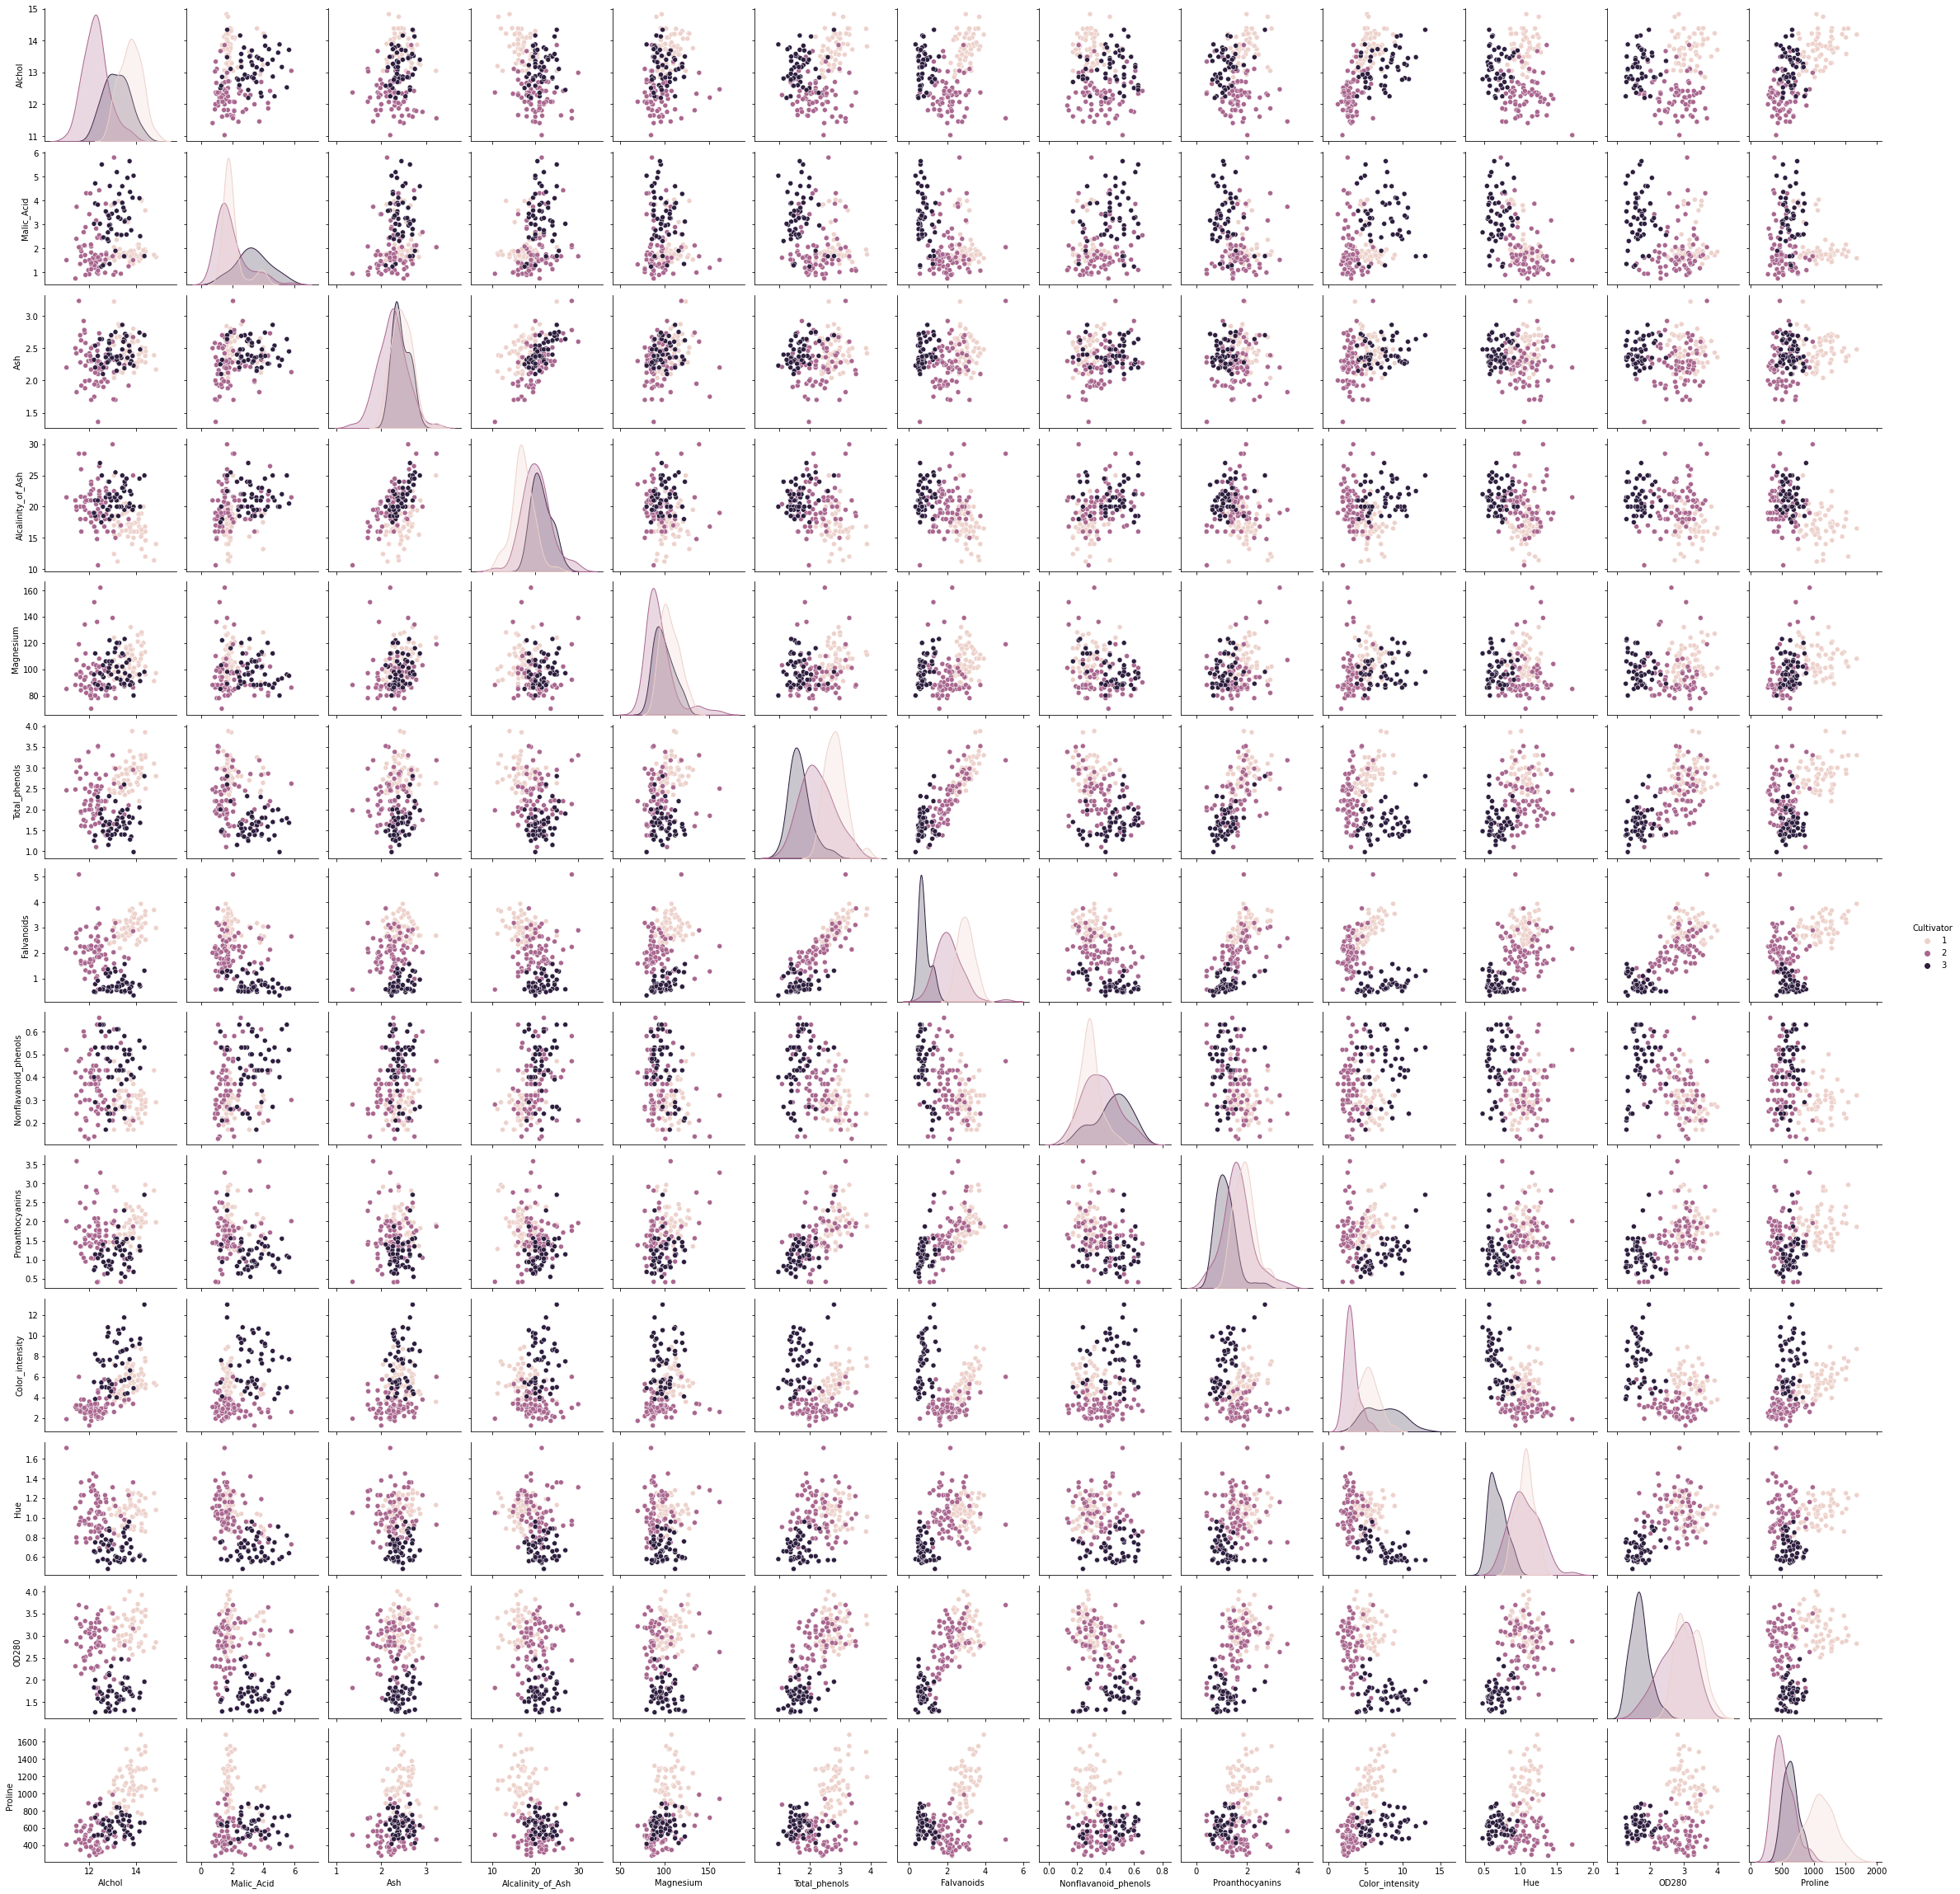

In [38]:
sns.pairplot(wine_df , diag_kind = 'kde' , hue='Cultivator')